In [1]:
%matplotlib notebook
import numpy
import math
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from scipy.special import sph_harm
from scipy.special import assoc_laguerre
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import ListedColormap

<IPython.core.display.Javascript object>


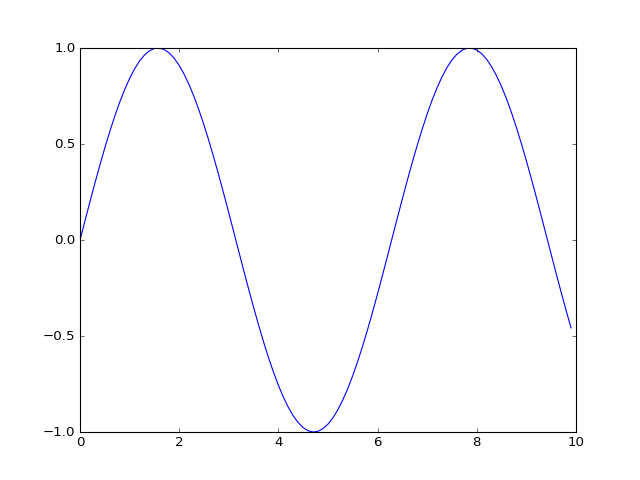

In [2]:
x=numpy.arange(0,10,0.1)
y=numpy.sin(x)

plt.figure()
plt.plot(x,y)
plt.show()

<IPython.core.display.Javascript object>


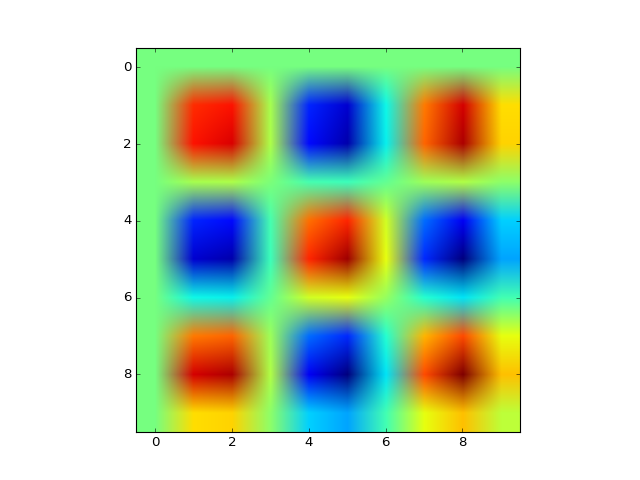

In [3]:
x = numpy.arange(0,10,1)
y = numpy.arange(0,10,1)
X,Y = numpy.meshgrid(x,y)
z = numpy.sin(X)*numpy.sin(Y)

plt.figure()
#plt.contour(z)
plt.imshow(z)
plt.show()


In [3]:
x = numpy.arange(-10,10,0.1)
y = numpy.arange(-10,10,0.1)
dz=0.1
zmin=-10
zmax=10
z = numpy.arange(zmin,zmax,dz)
X,Y,Z = numpy.meshgrid(x,y,z)
data = numpy.sin(X)*numpy.sin(Y)*numpy.sin(Z)
data = numpy.exp(-(X**2+Y**2+Z**2-6**2)**2/5)



<IPython.core.display.Javascript object>


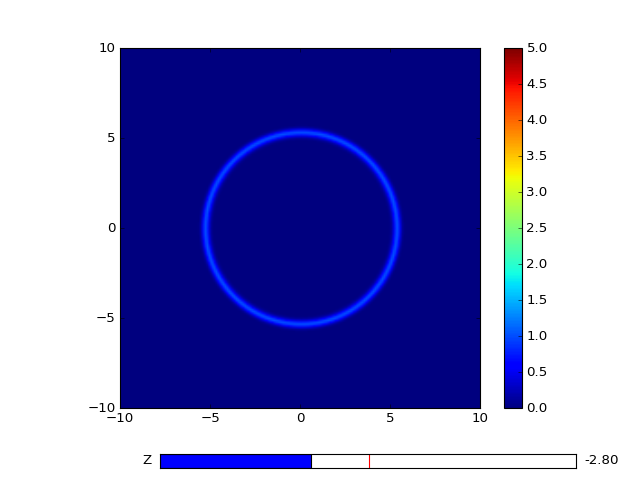

In [4]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.15)
im = plt.imshow(data[:,:,0], vmin=0, vmax=5,extent=[-10,10,-10,10])
plt.colorbar()
sli = Slider(plt.axes([0.25, 0.025, 0.65, 0.03]), "Z", z[0], z[len(z)-1], valinit=0)

def update(val):
    index = int((sli.val-zmin) / dz)
    im.set_data(data[:,:,index])
    
    
sli.on_changed(update)

plt.show()

In [5]:
def hydrogen_wf(n,l,m,X,Y,Z):
    R = numpy.sqrt(X**2+Y**2+Z**2)
    Theta = numpy.arccos(Z/R)
    Phi = numpy.arctan2(Y,X)
    
    rho = 2.*R/n
    s_harm=sph_harm(m, l, Theta, Phi)
    l_poly = assoc_laguerre(rho, n-l-1, 2*l+1)
    
    prefactor = numpy.sqrt((2./n)**3*math.factorial(n-l-1)/(2.*n*math.factorial(n+l)))
    wf = prefactor*numpy.exp(-rho/2.)*rho**l*s_harm*l_poly
    wf = numpy.nan_to_num(wf)
    return wf
    

In [6]:
dz=0.5
zmin=-10
zmax=10
x = numpy.arange(zmin,zmax,dz)
y = numpy.arange(zmin,zmax,dz)
z = numpy.arange(zmin,zmax,dz)
X,Y,Z = numpy.meshgrid(x,y,z)
data = hydrogen_wf(3,2,0,X,Y,Z)
data = data*data.conjugate()
data = data.real
print(sum(sum(sum(data)))*dz**3)

1.12709195582


C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


<IPython.core.display.Javascript object>


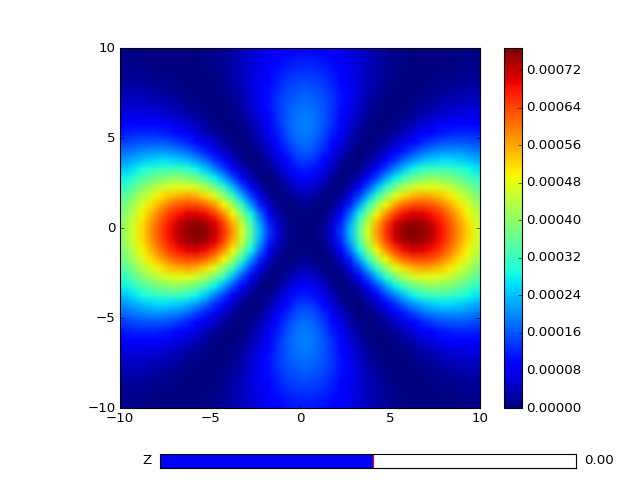

In [7]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.15)
#im = plt.imshow(data[:,:,0], vmin=0, vmax=0.05,extent=[zmin,zmax,zmin,zmax])
im = plt.imshow(data[:,:,int((0-zmin)/dz)],extent=[zmin,zmax,zmin,zmax])
#im = plt.contour(data[:,:,0])
plt.colorbar()
sli = Slider(plt.axes([0.25, 0.025, 0.65, 0.03]), "Z", z[0], z[len(z)-1], valinit=0)

def update(val):
    index = int((sli.val-zmin) / dz)
    im.set_data(data[:,:,index])
       
sli.on_changed(update)
plt.show()

<IPython.core.display.Javascript object>


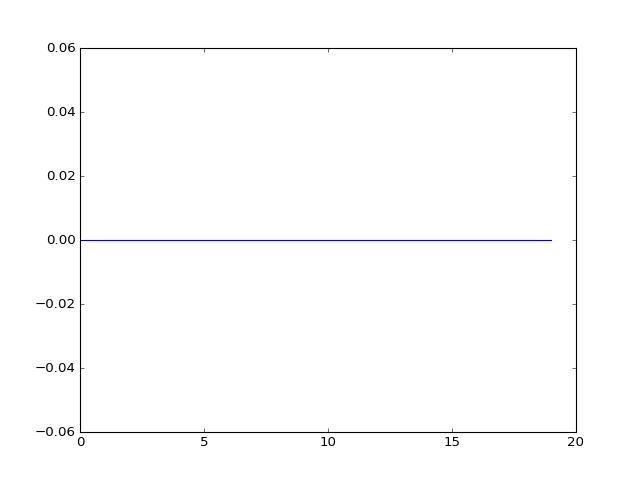

In [8]:
plt.figure()
plt.plot(data[int((0-zmin)/dz),int((0-zmin)/dz),:])
plt.show()

<IPython.core.display.Javascript object>


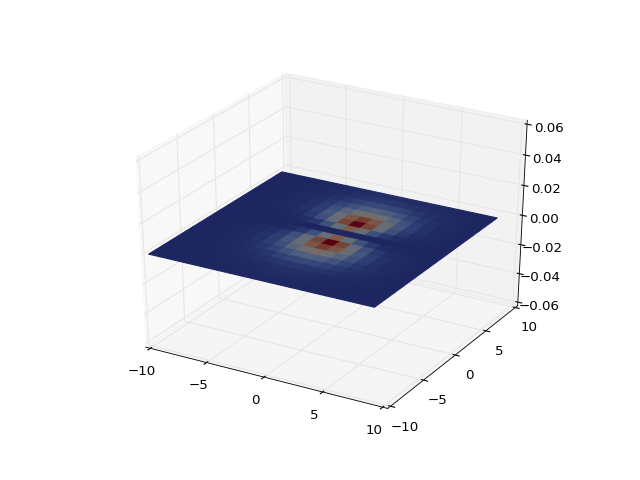

[[  3.58772122e-07   7.14225691e-07   1.36454263e-06   2.48559523e-06
    4.28518611e-06   6.93601836e-06   1.04514232e-05   1.45379325e-05
    1.85232879e-05   2.14815012e-05   2.25800726e-05   2.14815012e-05
    1.85232879e-05   1.45379325e-05   1.04514232e-05   6.93601836e-06
    4.28518611e-06   2.48559523e-06   1.36454263e-06   7.14225691e-07]
 [  5.78522810e-07   1.19533285e-06   2.37441755e-06   4.50231853e-06
    8.08243281e-06   1.36087995e-05   2.12740696e-05   3.05545547e-05
    3.99169995e-05   4.70382737e-05   4.97169909e-05   4.70382737e-05
    3.99169995e-05   3.05545547e-05   2.12740696e-05   1.36087995e-05
    8.08243281e-06   4.50231853e-06   2.37441755e-06   1.19533285e-06]
 [  8.73307281e-07   1.87608300e-06   3.88480261e-06   7.69549320e-06
    1.44512465e-05   2.54521327e-05   4.15338502e-05   6.19778415e-05
    8.34768561e-05   1.00335836e-04   1.06781071e-04   1.00335836e-04
    8.34768561e-05   6.19778415e-05   4.15338502e-05   2.54521327e-05
    1.44512465e-05

C:\Users\Joseph\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [12]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X, Y = numpy.meshgrid(x, y)

levels = numpy.linspace(0, 0.01, 40)

#for i in range(0, len(z)):
#    zval = z[i]
#    ax.contourf(X, Y, zval+data[:,:,i], zdir='z', levels=zval+.1*levels)
#ax.contourf(X, Y, data[:,:,int((0-zmin)/dz)], zdir='z', levels=.1*levels)
colors = data[:,:,int((0-zmin)/dz)]
print(colors)
print(numpy.max(colors))
colors = colors / numpy.max(colors)
print(colors)
ax.plot_surface(X,Y,numpy.zeros_like(X), rstride=1, cstride=1, facecolors = cm.coolwarm(colors))
ax.legend()
#ax.set_xlim3d(0, 1)
#ax.set_ylim3d(0, 1)
#ax.set_zlim3d(0, 10)

plt.show()

<IPython.core.display.Javascript object>


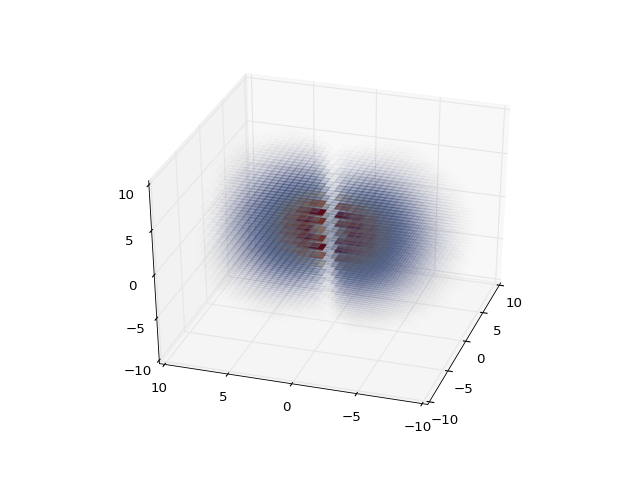

C:\Users\Joseph\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [20]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X, Y = numpy.meshgrid(x, y)

colors = data[:,:,int((0-zmin)/dz)]
max_val = numpy.max(colors)

# Choose colormap
cmap = cm.coolwarm

# Get the colormap colors
my_cmap = cmap(numpy.arange(cmap.N))

# Set alpha
my_cmap[:,-1] = numpy.linspace(0, 1, cmap.N)

# Create new colormap
my_cmap = ListedColormap(my_cmap)

for i in range(0, len(z)):
    zval = z[i]
    colors = data[:,:,i]
    colors = colors / max_val
    ax.plot_surface(X,Y,zval+numpy.zeros_like(X), rstride=1, cstride=1, facecolors = my_cmap(colors))
    #ax.plot_surface(X,Y,zval+numpy.zeros_like(X), rstride=1, cstride=1, alpha=0.5, facecolors = cm.coolwarm(colors))
ax.legend()
#ax.set_xlim3d(0, 1)
#ax.set_ylim3d(0, 1)
#ax.set_zlim3d(0, 10)

plt.show()

In [9]:
from skimage import measure

<IPython.core.display.Javascript object>


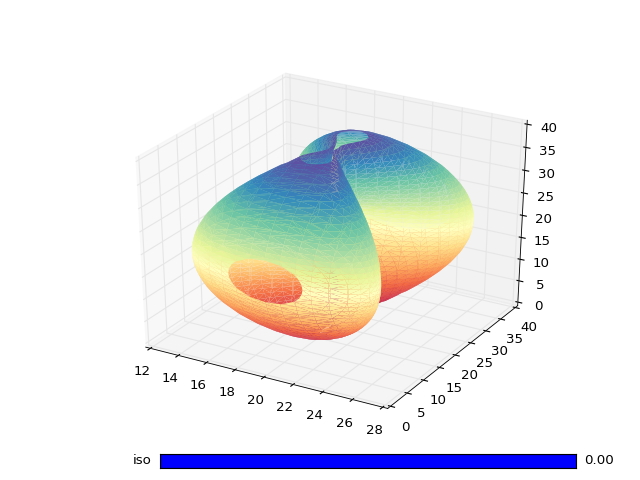

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

max_val = numpy.max(data)
#ax.plot_surface(X,Y,zval+numpy.zeros_like(X), rstride=1, cstride=1, facecolors = my_cmap(colors))
verts, faces = measure.marching_cubes(data, max_val/2, spacing = (1,1,1))
result=ax.plot_trisurf(verts[:,0], verts[:,1], faces, verts[:,2], cmap ='Spectral', lw=0)

sli = Slider(plt.axes([0.25, 0.025, 0.65, 0.03]), "iso", 0, max_val, valinit=0.0021)

def update(val):
    ax.clear()
    verts, faces = measure.marching_cubes(data, sli.val, spacing = (1,1,1))
    result = ax.plot_trisurf(verts[:,0], verts[:,1], faces, verts[:,2], cmap ='Spectral', lw=0)
    
       
sli.on_changed(update)

plt.show()

In [15]:
help(measure.marching_cubes)

Help on function marching_cubes in module skimage.measure._marching_cubes:

marching_cubes(volume, level, spacing=(1.0, 1.0, 1.0), gradient_direction='descent')
    Marching cubes algorithm to find iso-valued surfaces in 3d volumetric data
    
    Parameters
    ----------
    volume : (M, N, P) array of doubles
        Input data volume to find isosurfaces. Will be cast to `np.float64`.
    level : float
        Contour value to search for isosurfaces in `volume`.
    spacing : length-3 tuple of floats
        Voxel spacing in spatial dimensions corresponding to numpy array
        indexing dimensions (M, N, P) as in `volume`.
    gradient_direction : string
        Controls if the mesh was generated from an isosurface with gradient
        descent toward objects of interest (the default), or the opposite.
        The two options are:
        * descent : Object was greater than exterior
        * ascent : Exterior was greater than object
    
    Returns
    -------
    verts : (V, 3

In [26]:
help(ax.plot_trisurf)

Help on method plot_trisurf in module mpl_toolkits.mplot3d.axes3d:

plot_trisurf(*args, **kwargs) method of matplotlib.axes._subplots.Axes3DSubplot instance
    ============= ================================================
    Argument      Description
    ============= ================================================
    *X*, *Y*, *Z* Data values as 1D arrays
    *color*       Color of the surface patches
    *cmap*        A colormap for the surface patches.
    *norm*        An instance of Normalize to map values to colors
    *vmin*        Minimum value to map
    *vmax*        Maximum value to map
    *shade*       Whether to shade the facecolors
    ============= ================================================
    
    The (optional) triangulation can be specified in one of two ways;
    either::
    
      plot_trisurf(triangulation, ...)
    
    where triangulation is a :class:`~matplotlib.tri.Triangulation`
    object, or::
    
      plot_trisurf(X, Y, ...)
      plot_trisu